In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

In [3]:
all_data = pd.concat([data, test_data], sort=False)

In [4]:
all_data['fnlwgt_log'] = np.log(all_data['fnlwgt'])

In [5]:
test_data['fnlwgt_log']= np.log(test_data['fnlwgt'])

In [6]:
test_data = test_data.drop('fnlwgt', 1)

In [7]:
all_data = all_data.drop('fnlwgt', 1)

In [8]:
data.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [9]:
all_data['income'] = (all_data['income'] == '>50K').astype(int)

In [10]:
data['income'] = (data['income'] == '>50K').astype(int)

In [11]:
data.groupby(['sex', 'income'])['income'].count()

sex     income
Female  0          7614
        1           953
Male    0         12130
        1          5352
Name: income, dtype: int64

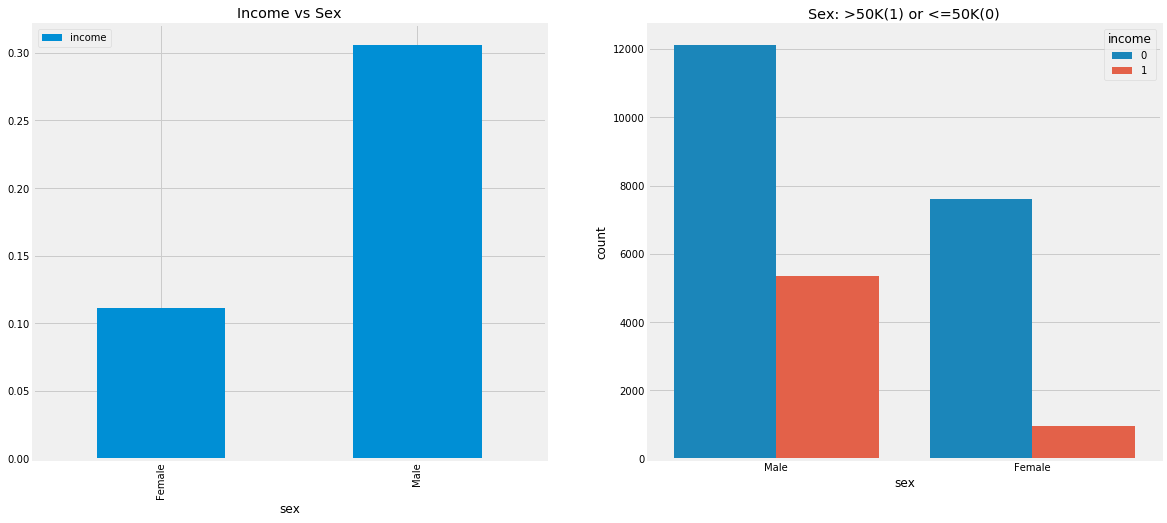

In [12]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data[['sex', 'income']].groupby(['sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Income vs Sex")
sns.countplot('sex', hue='income', data=data, ax=ax[1])
ax[1].set_title("Sex: >50K(1) or <=50K(0)")
plt.show()

education_num -> Ordinal Feature

In [13]:
pd.crosstab(data.education_num,data.income,margins=True).style.background_gradient(cmap='summer_r')

income,0,1,All
education_num,,,
1,40,0,40
2,129,5,134
3,252,13,265
4,476,29,505
5,396,22,418
6,678,53,731
7,867,55,922
8,333,26,359
9,7096,1337,8433


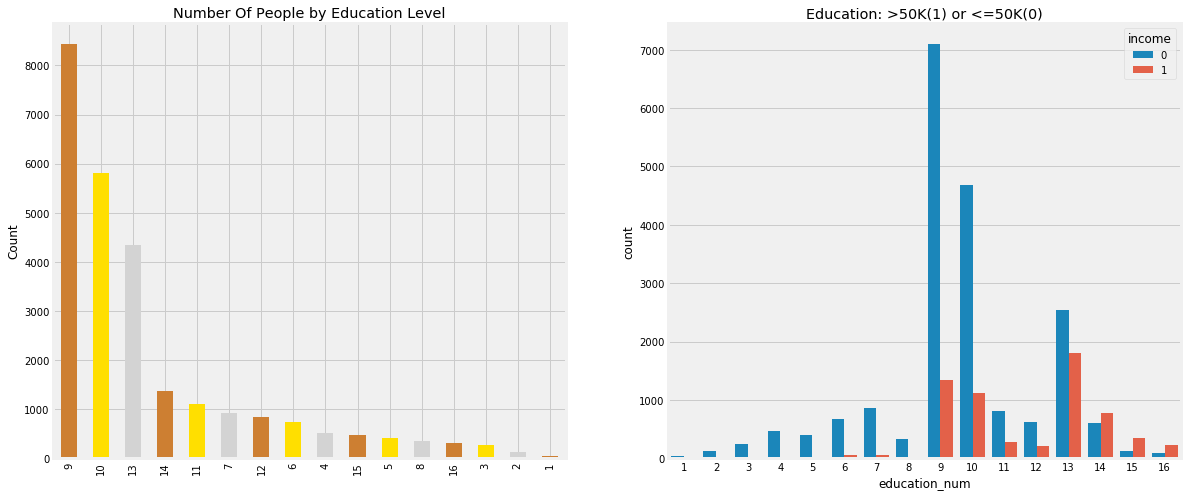

In [14]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
data['education_num'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number Of People by Education Level')
ax[0].set_ylabel('Count')
sns.countplot('education_num', hue='income', data=data, ax=ax[1])
ax[1].set_title('Education: >50K(1) or <=50K(0)')
plt.show()

In [15]:
pd.crosstab([data.sex, data.income], data.education_num, margins=True).style.background_gradient(cmap='summer_r')

In [16]:
education_map = {
    'Preschool': 'level_0', 
    '1st-4th': 'level_1', 
    '5th-6th': 'level_1', 
    '7th-8th': 'level_1', 
    '9th': 'level_1', 
    '10th': 'level_1', 
    '11th': 'level_1', 
    '12th': 'level_1', 
    'HS-grad': 'level_2', 
    'Some-college': 'level_3', 
    'Assoc-acdm': 'level_4', 
    'Assoc-voc': 'level_4', 
    'Bachelors': 'level_5', 
    'Masters': 'level_6', 
    'Prof-school': 'level_7', 
    'Doctorate': 'level_7',
}

In [17]:
all_data['education'] = all_data['education'].map(education_map)

In [18]:
all_data['education'].value_counts()

level_2    10501
level_3     7291
level_5     5355
level_1     4202
level_4     2449
level_6     1723
level_7      989
level_0       51
Name: education, dtype: int64

In [19]:
all_data = all_data.drop('education_num', 1)

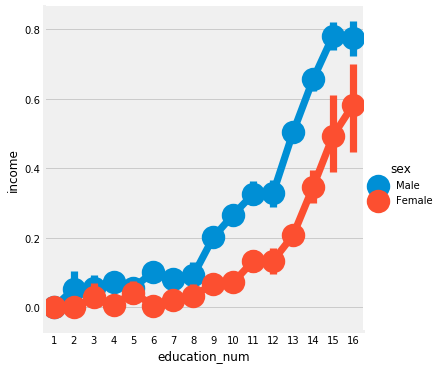

In [20]:
sns.factorplot('education_num', 'income', hue='sex', data=data)
plt.show()

Age -> Continuous Feature

In [21]:
print('Oldest Passenger was of:',data['age'].max(),'Years')
print('Youngest Passenger was of:',data['age'].min(),'Years')
print('Average Age on the People:',data['age'].mean(),'Years')

Oldest Passenger was of: 90 Years
Youngest Passenger was of: 17 Years
Average Age on the People: 38.56923490345119 Years


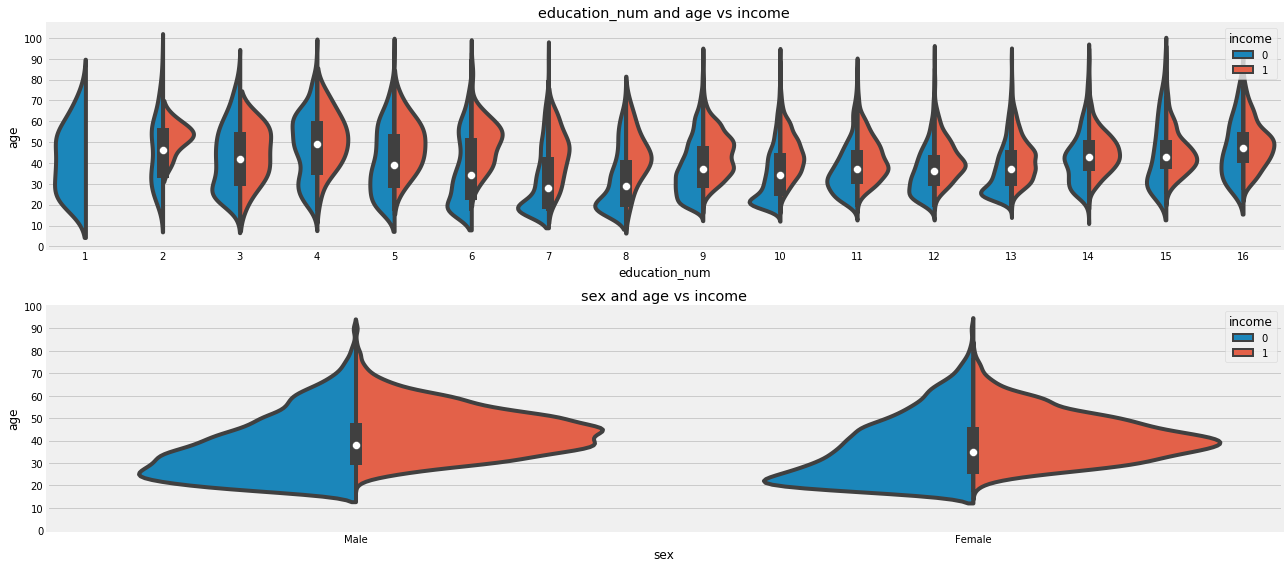

In [22]:
f, ax = plt.subplots(2,1, figsize=(18, 8))
sns.violinplot('education_num', 'age', hue='income', data=data, split=True, ax=ax[0])
ax[0].set_title('education_num and age vs income')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('sex', 'age', hue='income', data=data, split=True, ax=ax[1])
ax[1].set_title('sex and age vs income')
ax[1].set_yticks(range(0,110,10))
f.tight_layout()
plt.show()

In [23]:
import missingno as msno

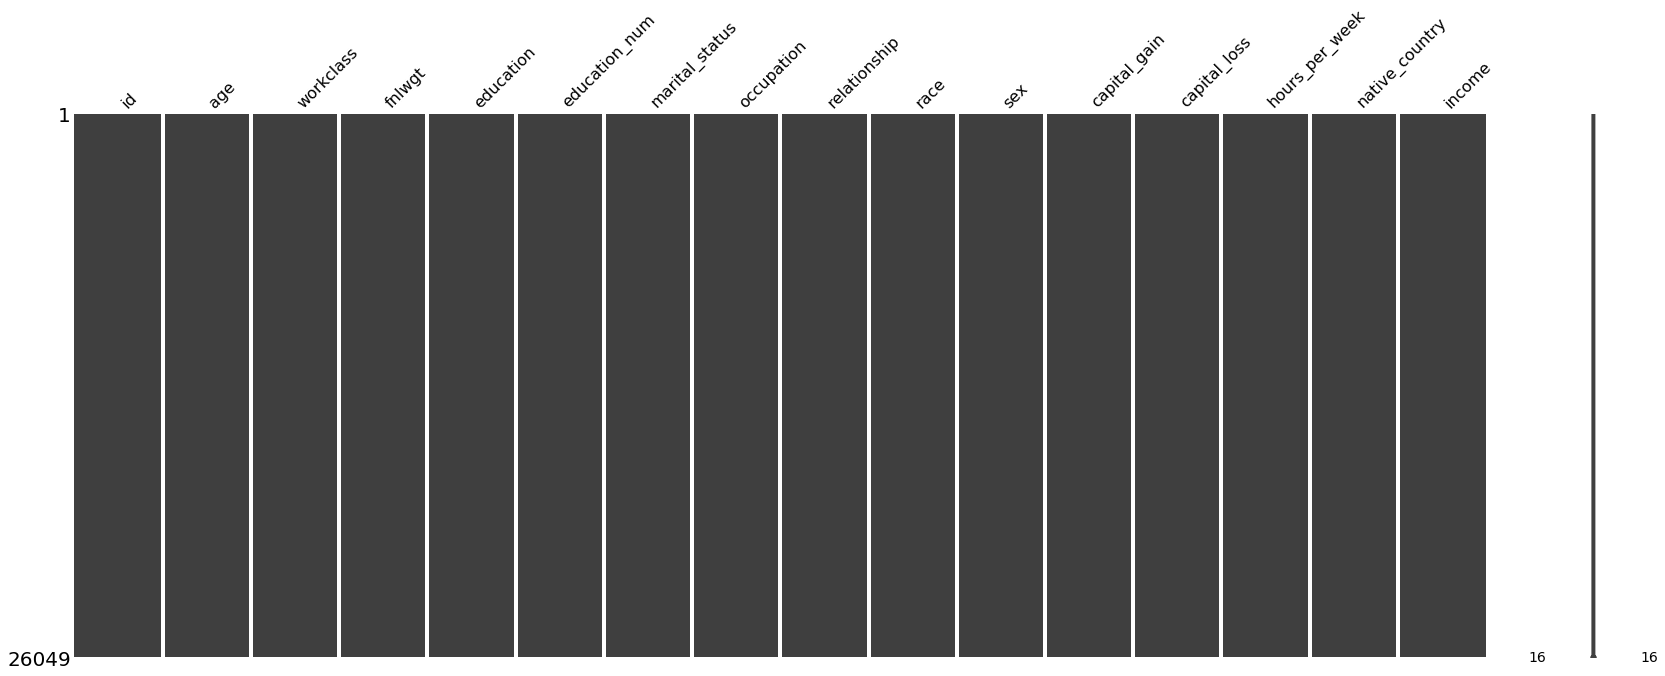

In [24]:
msno.matrix(data)

In [25]:
data.isnull().any()

id                False
age               False
workclass         False
fnlwgt            False
education         False
education_num     False
marital_status    False
occupation        False
relationship      False
race              False
sex               False
capital_gain      False
capital_loss      False
hours_per_week    False
native_country    False
income            False
dtype: bool

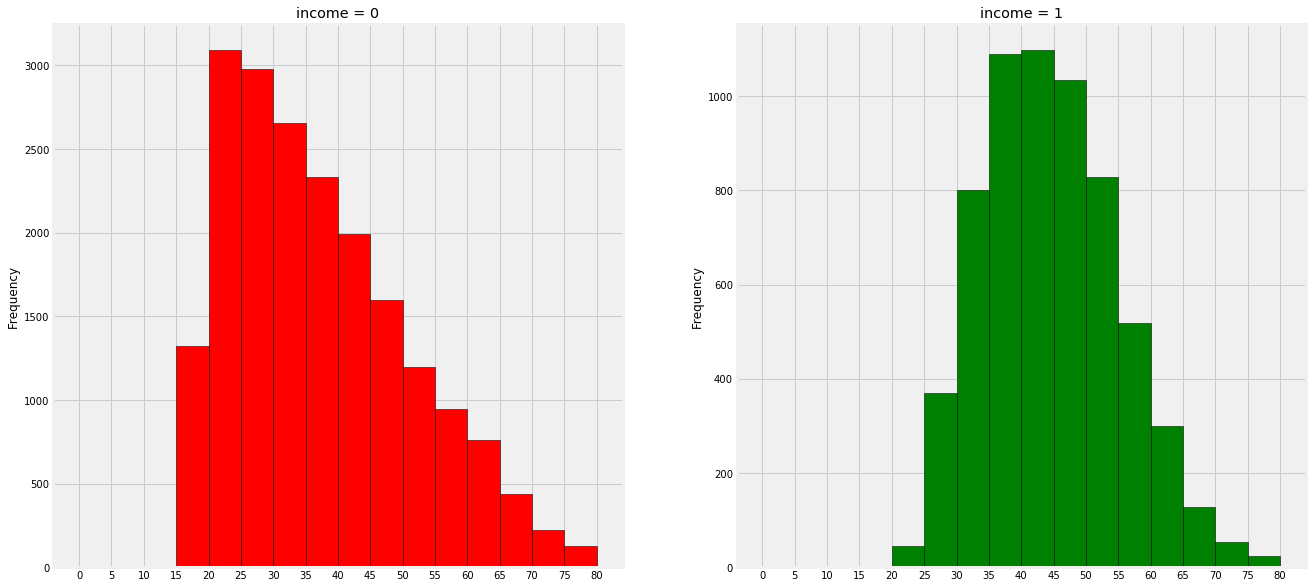

In [26]:
f, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].set_title('income = 0')
x1 = list(range(0,85,5))
data[data['income']==0].age.plot.hist(ax=ax[0],bins=x1, edgecolor='black',color='red') # data[data['income']==0].age.plot.hist(ax=ax[0],bins=20, edgecolor='black',color='red')
ax[0].set_xticks(x1)
ax[1].set_title('income = 1')
x2 = list(range(0,85,5))
data[data['income']==1].age.plot.hist(ax=ax[1], bins=x2, edgecolor='black', color='green')
ax[1].set_xticks(x2)
plt.show()

In [27]:
all_data['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

In [28]:
age_labels = [i for i in range(15)]
age_bands = [i for i in range(15, 95, 5)]
data['age_band'] = pd.cut(data['age'], bins=age_bands, labels = age_labels)
all_data['age_band']= pd.cut(all_data['age'], bins=age_bands, labels=age_labels)

In [29]:
all_data = all_data.drop('age', axis=1)
data = data.drop('age',axis=1)

In [30]:
all_data['age_band'].unique()

[4, 0, 1, 5, 6, ..., 10, 9, 11, 13, 14]
Length: 15
Categories (15, int64): [0 < 1 < 2 < 3 ... 11 < 12 < 13 < 14]

In [31]:
len(age_labels)

15

In [32]:
len(age_bands)

16

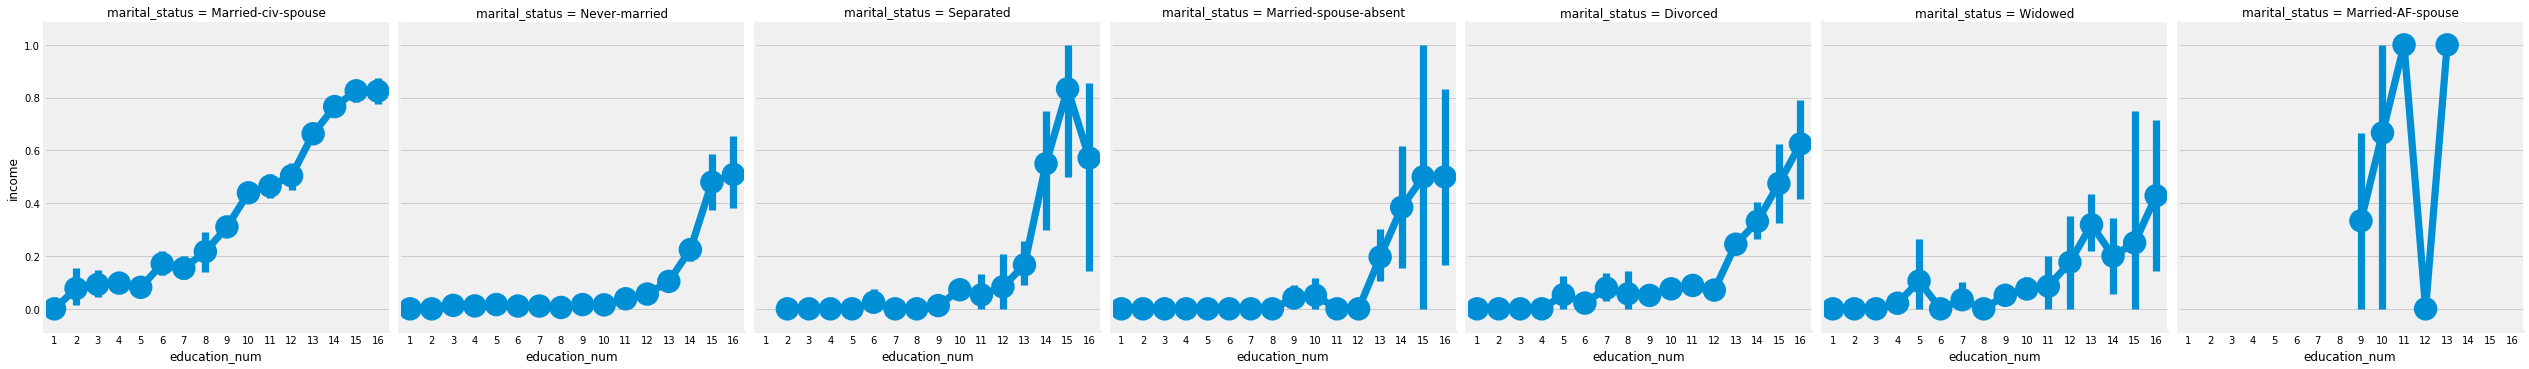

In [33]:
sns.factorplot('education_num', 'income', col='marital_status', data=data)
plt.show()

In [34]:
pd.crosstab([data.sex, data.income],[data.occupation, data.education_num],margins=True).style.background_gradient(cmap='summer_r')

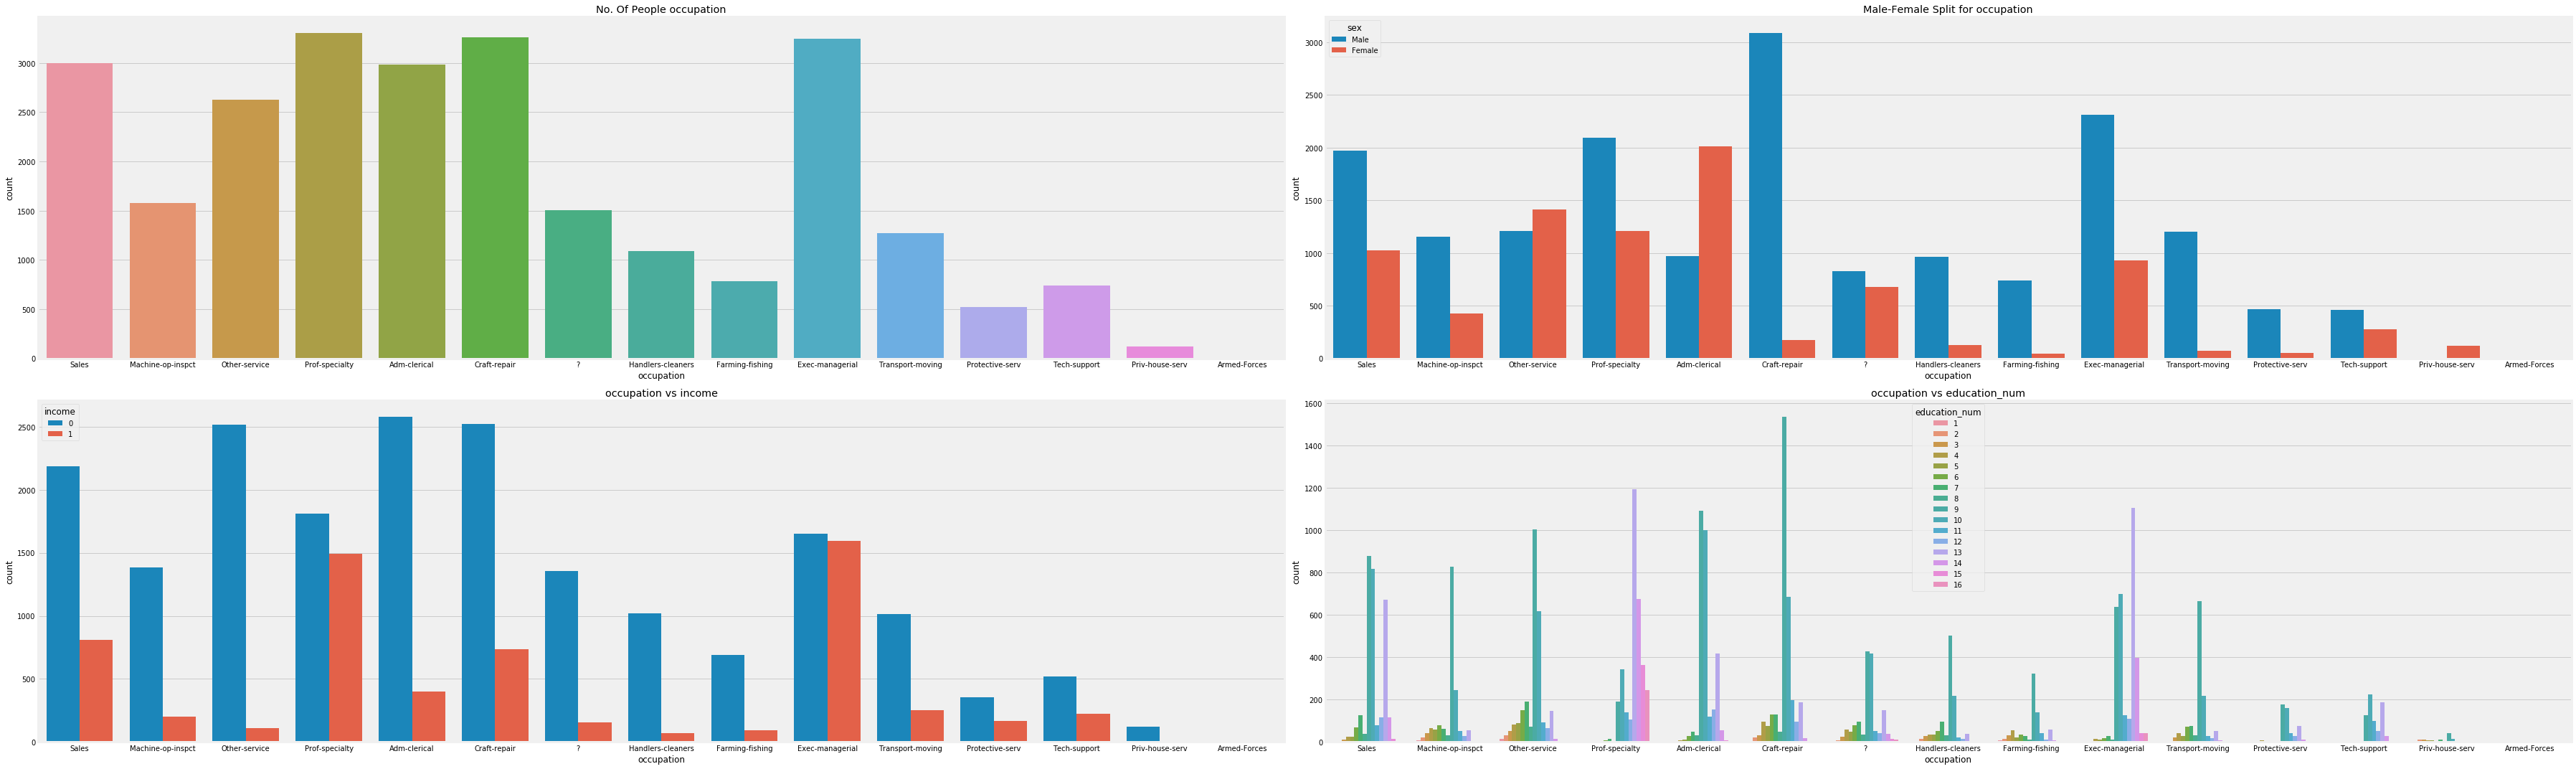

In [35]:
f,ax=plt.subplots(2,2,figsize=(50,15))
sns.countplot('occupation',data=data,ax=ax[0,0])
ax[0,0].set_title('No. Of People occupation')
sns.countplot('occupation',hue='sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for occupation')
sns.countplot('occupation',hue='income',data=data,ax=ax[1,0])
ax[1,0].set_title('occupation vs income')
sns.countplot('occupation',hue='education_num',data=data,ax=ax[1,1])
ax[1,1].set_title('occupation vs education_num')
f.tight_layout()
#plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

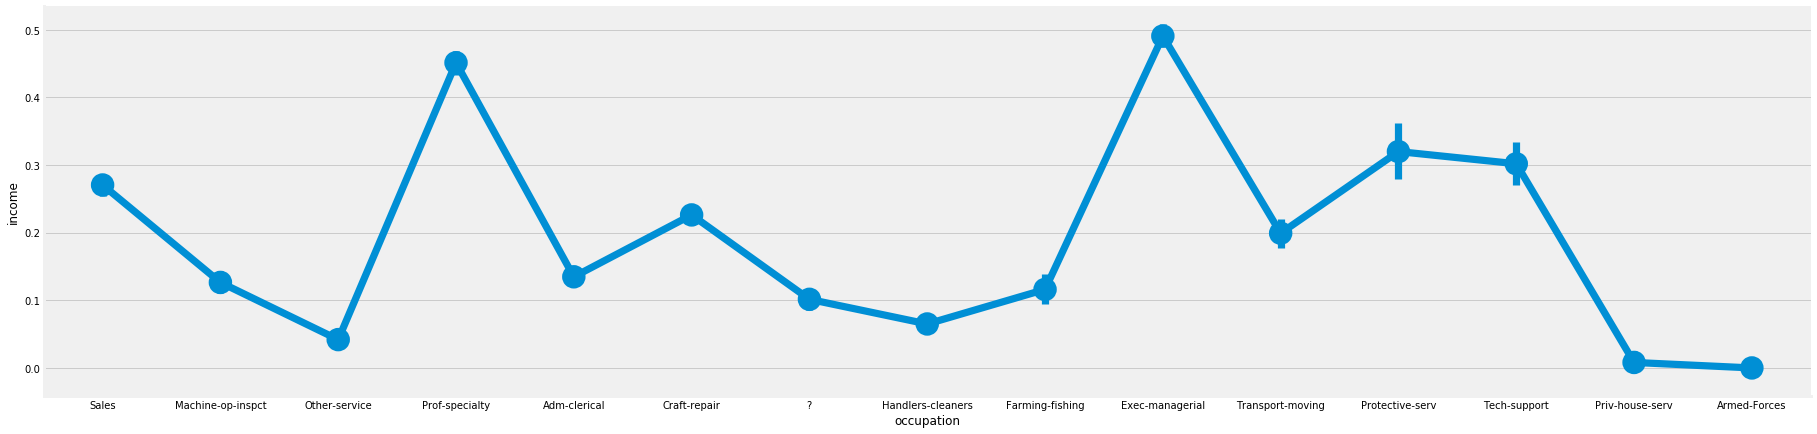

In [36]:
sns.factorplot('occupation','income',data=data)
fig=plt.gcf()
fig.set_size_inches(30,6)
plt.show()

In [37]:
all_data.loc[all_data['occupation'].isin(['Armed-Forces', 'Priv-house-serv']), 'occupation'] = 'Priv-house-serv'

In [38]:
cat_cols = [col for col in data.columns if data[col].dtype in ['O']]

In [39]:
cat_cols

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

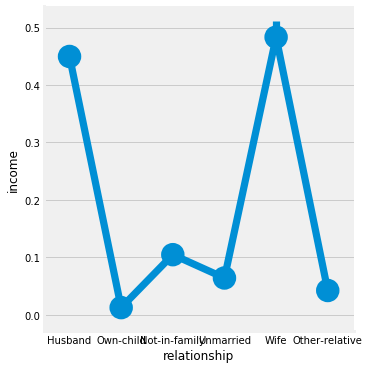

In [40]:
sns.factorplot('relationship', 'income', data=data)
plt.show()

In [1]:
sns.factorplot('marital_status', 'income', data=data)
plt.show()

NameError: name 'sns' is not defined

In [41]:
all_data['relationship'].unique()

array(['Husband', 'Own-child', 'Not-in-family', 'Unmarried', 'Wife',
       'Other-relative'], dtype=object)

In [42]:
all_data.loc[all_data['relationship'].isin(['Husband', 'Wife']), 'relationship'] = 'normal'
all_data.loc[all_data['relationship'].isin(['Own-child', 'Not-in-family', 'Unmarried', 'Other-relative']), 'relationship'] = 'abnormal'

In [43]:
all_data.loc[all_data['marital_status'].isin(['Married-AF-spouse', 'Married-civ-spouse']), 'marital_status'] = 'Married'
all_data.loc[all_data['marital_status'].isin(['Married-spouse-absent', 'Divorced', 'Never-married', 'Separated', 'Widowed']), 'marital_status']= 'Never-married'

In [44]:
all_data['marital_status'].unique()

array(['Married', 'Never-married'], dtype=object)

In [45]:
data['workclass'].value_counts()

Private             18123
Self-emp-not-inc     2030
Local-gov            1692
?                    1502
State-gov            1043
Self-emp-inc          877
Federal-gov           765
Without-pay            11
Never-worked            6
Name: workclass, dtype: int64

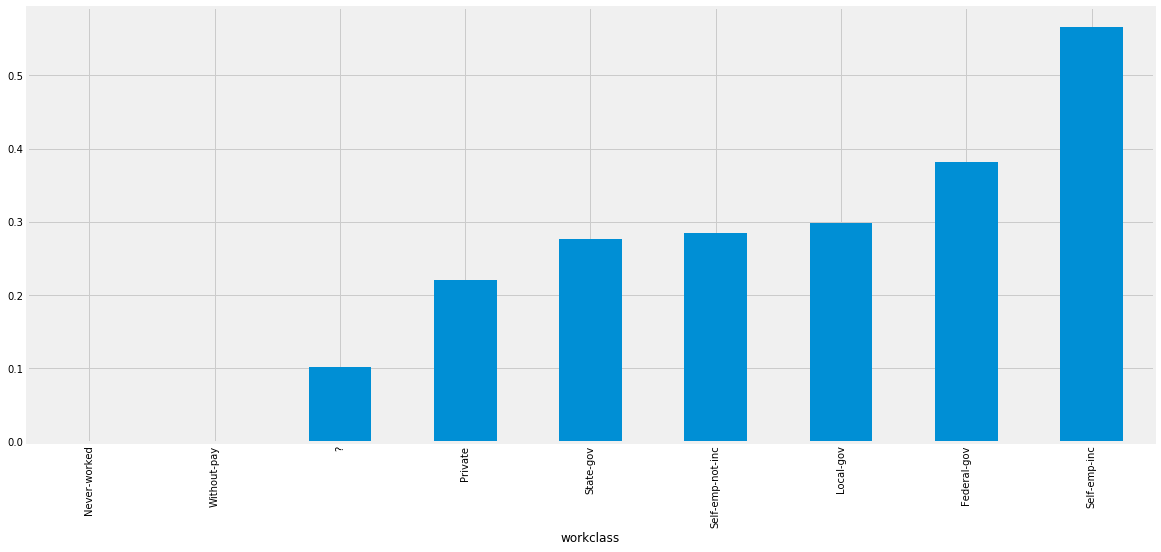

In [46]:
data.groupby(['workclass'])['income'].mean().sort_values().plot(kind='bar', figsize=(18,8))
plt.show()

In [47]:
all_data['workclass'].unique()

array(['Private', 'State-gov', '?', 'Self-emp-not-inc', 'Local-gov',
       'Federal-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [48]:
all_data.loc[all_data['workclass'].isin(['Never-worked', 'Without-pay']), 'workclass'] = 'others'

In [49]:
all_data['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [50]:
income_01 = ['Jamaica',
 'Haiti',
 'Puerto-Rico',
 'Laos',
 'Thailand',
 'Ecuador',]

income_02 = ['Outlying-US(Guam-USVI-etc)',
 'Honduras',
 'Columbia',
 'Dominican-Republic',
 'Mexico',
 'Guatemala',
 'Portugal',
 'Trinadad&Tobago',
 'Nicaragua',
 'Peru',
 'Vietnam',
 'El-Salvador',]

income_03 = ['Poland',
 'Ireland',
 'South',
 'China',]

income_04 = [
    'United-States',
]
income_05 = [
 'Greece',
 'Scotland',
 'Cuba',
 'Hungary',
 'Hong',
 'Holand-Netherlands',
]
income_06 = [
 'Philippines',
 'Canada',
]
income_07 = [
 'England',
 'Germany',
]

income_08 = [
 'Italy',
 'India',
 'Japan',
 'France',
 'Yugoslavia',
 'Cambodia',
]

income_09 = [
 'Taiwan',
 'Iran',
]

income_other=['?', ]

In [51]:
def convert_country(x):
    if x in income_01:
        return 'income_01'
    elif x in income_02:
        return 'income_02'
    elif x in income_03:
        return 'income_03'
    elif x in income_04:
        return 'income_04'
    elif x in income_05:
        return 'income_05'
    elif x in income_06:
        return 'income_06'
    elif x in income_07:
        return 'income_07'
    elif x in income_08:
        return 'income_08'
    elif x in income_09:
        return 'income_09'
    else:
        return 'income_other'

In [52]:
all_data['country_bin'] = all_data['native_country'].apply(convert_country)

In [53]:
all_data['country_bin'].value_counts()


income_04       29170
income_02        1157
income_other      583
income_06         319
income_01         303
income_08         299
income_03         239
income_07         227
income_05         170
income_09          94
Name: country_bin, dtype: int64

In [54]:
#data['capital_net'] = data['capital_gain'] - data['capital_loss']
all_data['capital_net'] = all_data['capital_gain'] - all_data['capital_loss']

In [55]:
#data= data.drop(['capital_gain', 'capital_loss'], axis=1)
all_data= all_data.drop(['capital_gain', 'capital_loss'], axis=1)

In [56]:
bins=[0, 5000, 50000, 100000]
all_data['capital_net'] = np.digitize(all_data['capital_net'], bins)

In [57]:
all_data['capital_net'].unique()

array([1, 2, 0, 3], dtype=int64)

In [58]:
all_data.columns

Index(['id', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'hours_per_week', 'native_country',
       'income', 'fnlwgt_log', 'age_band', 'country_bin', 'capital_net'],
      dtype='object')

In [59]:
features = [
    'age_band', 
    'workclass', 
    'fnlwgt_log', 
    'education', 
    'marital_status',
    'occupation',
    'relationship', 
    'race',
    'sex',
    'capital_net',
    'hours_per_week',
    'country_bin',
]

In [60]:
label = [
    'income'
]

In [61]:
all_data_dummies = pd.get_dummies(all_data[features + label])
all_data_dummies.head()

,fnlwgt_log,capital_net,hours_per_week,income,age_band_0,age_band_1,age_band_2,age_band_3,age_band_4,age_band_5,...,country_bin_income_01,country_bin_income_02,country_bin_income_03,country_bin_income_04,country_bin_income_05,country_bin_income_06,country_bin_income_07,country_bin_income_08,country_bin_income_09,country_bin_income_other
0,12.034917,1,60,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,11.529055,1,20,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,12.775237,1,16,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,11.926081,1,25,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,11.713693,1,20,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [62]:
train_features = all_data_dummies.drop('income', 1).iloc[:len(data)]
test_features = all_data_dummies.drop('income', 1).iloc[len(data):]

In [63]:
train_features.shape, test_features.shape

((26049, 69), (6512, 69))

In [64]:
train_label = data[label]

In [65]:
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score, confusion_matrix
from sklearn.metrics import log_loss
from tqdm import tqdm_notebook
import lightgbm as lgbm

In [66]:
x_train, x_valid, y_train, y_valid = train_test_split(train_features, train_label, stratify=train_label, test_size=0.2, random_state=1234)

In [67]:
NUM_BOOST_ROUND = 10000
N_SPLITS = 5

lgbm_param = {
    'objective': 'binary',
    'boosting_type':'gbdt',
    'colsample_bytree':1.0,
    'importance_type':'split',
    'learning_rate':0.1,
    'min_child_samples':20,
    'min_child_weight':0.001,
    'min_split_gain':0,
    'n_estimators':10000,
    'num_leaves':40,
    'random_state':1234,
    'early_stopping_rounds': 200,
    'reg_alpha':0.6,
    'reg_lambda':0.5,
    'subsample':1.0,
    'subsample_for_bin':200000,
    'subsample_freq':0, 
    'n_jobs':-1, 
}

In [68]:
dtrain = lgbm.Dataset(x_train, y_train)
dvalid = lgbm.Dataset(x_valid, y_valid)

In [69]:
model = lgbm.train(lgbm_param, dtrain, NUM_BOOST_ROUND, 
                   valid_sets=(dtrain, dvalid), 
                   valid_names=('train', 'valid'), 
                   verbose_eval=100,
                  )

[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] Number of positive: 5044, number of negative: 15795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 473
[LightGBM] [Info] Number of data points in the train set: 20839, number of used features: 68
[LightGBM] [Warning] Unknown parameter: importance_type
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.242046 -> initscore=-1.141494
[LightGBM] [Info] Start training from score -1.141494
Training until validation scores don't improve for 200 rounds
[100]	train's binary_logloss: 0.259787	valid's binary_logloss: 0.325561
[200]	train's binary_logloss: 0.232796	valid's binary_logloss: 0.332169
Early stopping, best iteration is:
[54]	train's binary_logloss: 0.2

In [70]:
threshold = 0.5
valid_prediction = model.predict(x_valid)
valid_prediction[valid_prediction > threshold] = 1
valid_prediction[valid_prediction <= threshold] = 0
print(classification_report(y_valid, valid_prediction))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3949
           1       0.72      0.61      0.66      1261

    accuracy                           0.85      5210
   macro avg       0.80      0.77      0.78      5210
weighted avg       0.84      0.85      0.84      5210



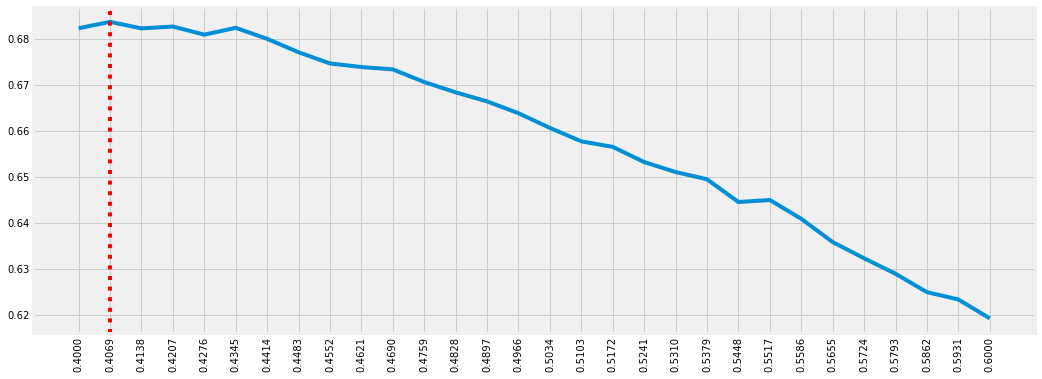

In [71]:
f1_threshold = np.linspace(0.4, 0.6, 30)
f1_scores = []
max_score = 0
max_threshold = 0

for t in f1_threshold:
    valid_prediction = model.predict(x_valid)
    valid_prediction[valid_prediction > t] = 1
    valid_prediction[valid_prediction <= t] = 0
    score_ = f1_score(y_valid, valid_prediction)
    f1_scores.append(score_)
    if score_ > max_score:
        max_score = score_
        max_threshold = t
        
plt.figure(figsize=(16, 6))
plt.plot(f1_threshold, f1_scores)
plt.axvline(x=max_threshold, linestyle=':', color='r')
plt.xticks(f1_threshold, rotation=90)
plt.show()

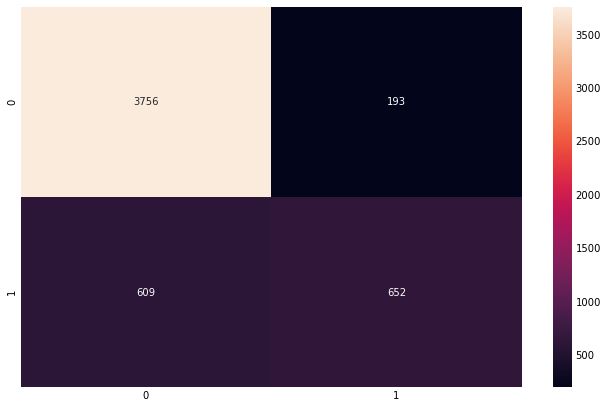

In [72]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_valid, valid_prediction), annot=True, fmt='g')

In [73]:
pred = model.predict(test_features)

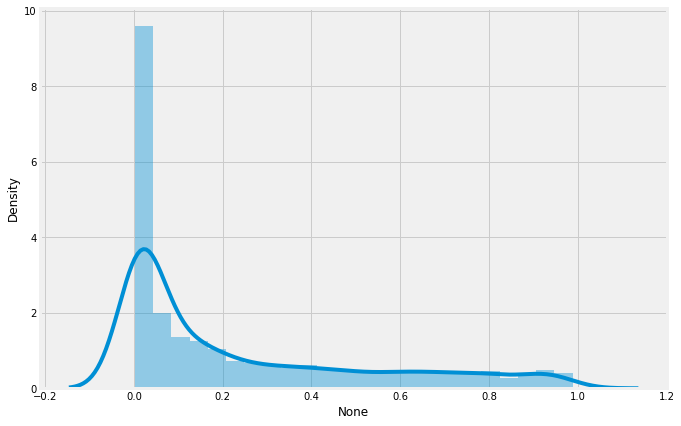

In [74]:
plt.figure(figsize=(10,7))
sns.distplot(pred)

In [75]:
# 기본 0.5으로 설정
THRESHOLD = 0.5

print(len(pred[pred >= THRESHOLD]) / len(pred[pred < THRESHOLD]))

0.250864387245486


In [76]:
pred[pred >= THRESHOLD] = 1
pred[pred < THRESHOLD] = 0

In [77]:
income_pct = data['income'].value_counts()[1] / data['income'].value_counts()[0]
income_pct

0.3193375202593193

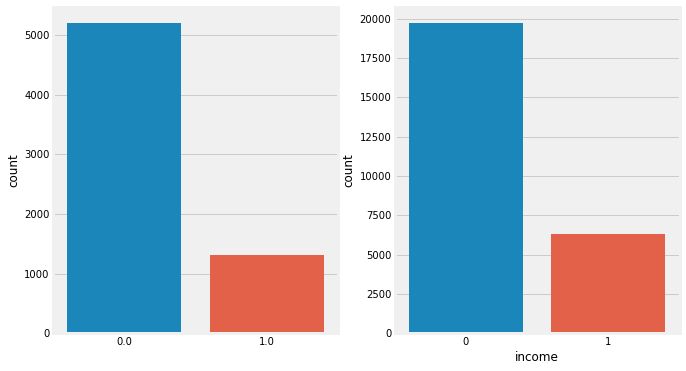

In [78]:
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.countplot(pred)

plt.subplot(122)
sns.countplot(data['income'])
plt.show()

In [79]:
!pip install pycaret

In [80]:
from pycaret.classification import *

In [81]:
features, label

(['age_band',
  'workclass',
  'fnlwgt_log',
  'education',
  'marital_status',
  'occupation',
  'relationship',
  'race',
  'sex',
  'capital_net',
  'hours_per_week',
  'country_bin'],
 ['income'])

In [82]:
all_data_caret = all_data[features + label]

In [83]:
all_data

,id,workclass,education,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,fnlwgt_log,age_band,country_bin,capital_net
0,0,Private,level_2,Married,Sales,normal,White,Male,60,United-States,1,12.034917,4,income_04,1
1,1,Private,level_1,Never-married,Machine-op-inspct,abnormal,White,Male,20,United-States,0,11.529055,0,income_04,1
2,2,Private,level_3,Never-married,Other-service,abnormal,White,Male,16,United-States,0,12.775237,0,income_04,1
3,3,Private,level_3,Never-married,Prof-specialty,abnormal,White,Female,25,United-States,0,11.926081,1,income_04,1
4,4,Private,level_3,Never-married,Adm-clerical,abnormal,Black,Female,20,?,0,11.713693,1,income_other,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,6507,Private,level_5,Married,Sales,normal,White,Male,40,United-States,0,11.024236,3,income_04,1
6508,6508,Self-emp-inc,level_5,Married,Tech-support,normal,White,Male,40,United-States,0,10.379256,5,income_04,1
6509,6509,Private,level_1,Married,Other-service,normal,White,Male,40,Mexico,0,12.921932,4,income_02,1
6510,6510,Private,level_2,Married,Craft-repair,normal,White,Male,40,United-States,0,12.102610,3,income_04,1


In [84]:
all_data_caret.head()

,age_band,workclass,fnlwgt_log,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income
0,4,Private,12.034917,level_2,Married,Sales,normal,White,Male,1,60,income_04,1
1,0,Private,11.529055,level_1,Never-married,Machine-op-inspct,abnormal,White,Male,1,20,income_04,0
2,0,Private,12.775237,level_3,Never-married,Other-service,abnormal,White,Male,1,16,income_04,0
3,1,Private,11.926081,level_3,Never-married,Prof-specialty,abnormal,White,Female,1,25,income_04,0
4,1,Private,11.713693,level_3,Never-married,Adm-clerical,abnormal,Black,Female,1,20,income_other,0


In [85]:
all_data_caret['age_band'] = all_data_caret['age_band'].astype('float')
# all_data_caret['capital_net'] = all_data_caret['capital_net'].astype('float')
all_data_caret['hours_per_week'] = all_data_caret['hours_per_week'].astype('float')
all_data_caret['capital_net'] = all_data_caret['capital_net'].astype('float')

In [86]:
train_clean = all_data_caret[:len(data)]
test_clean = all_data_caret[len(data):]

In [87]:
train_clean = train_clean.drop('fnlwgt_log', axis=1)
test_clean = test_clean.drop('fnlwgt_log', axis=1)

In [88]:
train_clean['income'] = train_clean['income'].astype('int')

In [89]:
train_clean.head()

,age_band,workclass,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income
0,4.0,Private,level_2,Married,Sales,normal,White,Male,1.0,60.0,income_04,1
1,0.0,Private,level_1,Never-married,Machine-op-inspct,abnormal,White,Male,1.0,20.0,income_04,0
2,0.0,Private,level_3,Never-married,Other-service,abnormal,White,Male,1.0,16.0,income_04,0
3,1.0,Private,level_3,Never-married,Prof-specialty,abnormal,White,Female,1.0,25.0,income_04,0
4,1.0,Private,level_3,Never-married,Adm-clerical,abnormal,Black,Female,1.0,20.0,income_other,0


In [90]:
train_clean.head()

,age_band,workclass,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income
0,4.0,Private,level_2,Married,Sales,normal,White,Male,1.0,60.0,income_04,1
1,0.0,Private,level_1,Never-married,Machine-op-inspct,abnormal,White,Male,1.0,20.0,income_04,0
2,0.0,Private,level_3,Never-married,Other-service,abnormal,White,Male,1.0,16.0,income_04,0
3,1.0,Private,level_3,Never-married,Prof-specialty,abnormal,White,Female,1.0,25.0,income_04,0
4,1.0,Private,level_3,Never-married,Adm-clerical,abnormal,Black,Female,1.0,20.0,income_other,0


In [91]:
setup(data = train_clean, target = 'income', session_id=1234, silent=True)

,Description,Value
0,session_id,1234
1,Target,income
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(26049, 12)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


(1234,
 [('Setup Config',
                                  Description             Value
   0                               session_id              1234
   1                                   Target            income
   2                              Target Type            Binary
   3                            Label Encoded              None
   4                            Original Data       (26049, 12)
   5                           Missing Values             False
   6                         Numeric Features                 3
   7                     Categorical Features                 8
   8                         Ordinal Features             False
   9                High Cardinality Features             False
   10                 High Cardinality Method              None
   11                   Transformed Train Set       (18234, 50)
   12                    Transformed Test Set        (7815, 50)
   13                      Shuffle Train-Test              True
   14         

In [92]:
#compare_models()

In [93]:
# lgbm = create_model('lightgbm')

In [94]:
# tuned_lgbm = tune_model(lgbm)

In [95]:
# plot_model(estimator = tuned_lgbm, plot = 'auc')
# plot_model(estimator = tuned_lgbm, plot = 'confusion_matrix')

In [96]:
# evaluate_model(tuned_lgbm)

In [97]:
# lgbm_final = finalize_model(tuned_lgbm)
# ans = predict_model(lgbm_final,test_clean)

In [98]:
campare_model = compare_models(sort = 'F1', n_select = 3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8585,0.9127,0.7828,0.8535,0.8547,0.5935,0.5963,0.0750
catboost,CatBoost Classifier,0.8576,0.9125,0.7803,0.8525,0.8536,0.5900,0.5931,7.6370
gbc,Gradient Boosting Classifier,0.8578,0.9127,0.7722,0.8519,0.8523,0.5832,0.5889,0.4870
ada,Ada Boost Classifier,0.8557,0.9089,0.7721,0.8497,0.8506,0.5794,0.5841,0.1760
xgboost,Extreme Gradient Boosting,0.8535,0.9076,0.7782,0.8486,0.8500,0.5812,0.5834,0.8830
rf,Random Forest Classifier,0.8407,0.8853,0.7659,0.8363,0.8379,0.5495,0.5508,0.4340
lda,Linear Discriminant Analysis,0.8390,0.8848,0.7471,0.8314,0.8328,0.5285,0.5336,0.0610
lr,Logistic Regression,0.8387,0.8890,0.7465,0.8310,0.8324,0.5274,0.5325,1.3650
ridge,Ridge Classifier,0.8382,0.0000,0.7276,0.8292,0.8276,0.5068,0.5196,0.0250
et,Extra Trees Classifier,0.8282,0.8476,0.7477,0.8231,0.8250,0.5130,0.5145,0.5260


In [99]:
blended_model = blend_models(estimator_list = campare_model, fold = 5, method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8624,0.9151,0.7888,0.8577,0.8588,0.6054,0.6080
1,0.8632,0.9152,0.7796,0.8576,0.8578,0.5991,0.6048
2,0.8604,0.9173,0.7840,0.8554,0.8565,0.5981,0.6012
3,0.8547,0.9097,0.7761,0.8492,0.8506,0.5813,0.5843
4,0.8593,0.9128,0.7800,0.8539,0.8549,0.5925,0.5963
Mean,0.8600,0.9140,0.7817,0.8548,0.8557,0.5953,0.5989
SD,0.0030,0.0026,0.0043,0.0031,0.0029,0.0081,0.0083


In [100]:
test_clean.head()

,age_band,workclass,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income
0,2.0,Private,level_3,Never-married,Adm-clerical,abnormal,White,Female,1.0,40.0,income_04,0
1,4.0,Self-emp-inc,level_2,Married,Exec-managerial,normal,White,Male,1.0,50.0,income_04,0
2,0.0,Private,level_3,Never-married,Handlers-cleaners,abnormal,White,Male,1.0,25.0,income_04,0
3,4.0,Private,level_4,Married,Exec-managerial,normal,White,Male,1.0,50.0,income_04,0
4,4.0,Private,level_7,Married,Prof-specialty,normal,White,Male,1.0,99.0,income_08,0


In [101]:
train_clean.head()

,age_band,workclass,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income
0,4.0,Private,level_2,Married,Sales,normal,White,Male,1.0,60.0,income_04,1
1,0.0,Private,level_1,Never-married,Machine-op-inspct,abnormal,White,Male,1.0,20.0,income_04,0
2,0.0,Private,level_3,Never-married,Other-service,abnormal,White,Male,1.0,16.0,income_04,0
3,1.0,Private,level_3,Never-married,Prof-specialty,abnormal,White,Female,1.0,25.0,income_04,0
4,1.0,Private,level_3,Never-married,Adm-clerical,abnormal,Black,Female,1.0,20.0,income_other,0


In [102]:
final_model = finalize_model(blended_model)
ensemble_prediction = predict_model(final_model,test_clean)

In [103]:
ensemble_prediction['id'] = np.arange(len(ensemble_prediction))

In [104]:
ensemble_prediction['prediction'] = ensemble_prediction['Label']

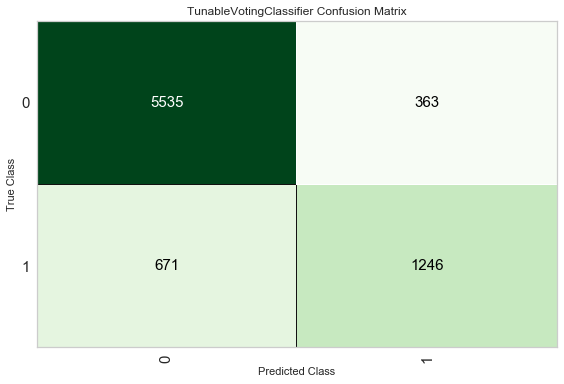

In [105]:
plot_model(estimator = final_model, plot = 'auc')
plot_model(estimator = final_model, plot = 'confusion_matrix')

In [106]:
ensemble_prediction

,age_band,workclass,education,marital_status,occupation,relationship,race,sex,capital_net,hours_per_week,country_bin,income,Label,Score,id,prediction
0,2.0,Private,level_3,Never-married,Adm-clerical,abnormal,White,Female,1.0,40.0,income_04,0,0,0.9898,0,0
1,4.0,Self-emp-inc,level_2,Married,Exec-managerial,normal,White,Male,1.0,50.0,income_04,0,1,0.6116,1,1
2,0.0,Private,level_3,Never-married,Handlers-cleaners,abnormal,White,Male,1.0,25.0,income_04,0,0,0.9977,2,0
3,4.0,Private,level_4,Married,Exec-managerial,normal,White,Male,1.0,50.0,income_04,0,1,0.7280,3,1
4,4.0,Private,level_7,Married,Prof-specialty,normal,White,Male,1.0,99.0,income_08,0,1,0.7060,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6507,3.0,Private,level_5,Married,Sales,normal,White,Male,1.0,40.0,income_04,0,1,0.5519,6507,1
6508,5.0,Self-emp-inc,level_5,Married,Tech-support,normal,White,Male,1.0,40.0,income_04,0,1,0.6634,6508,1
6509,4.0,Private,level_1,Married,Other-service,normal,White,Male,1.0,40.0,income_02,0,0,0.9672,6509,0
6510,3.0,Private,level_2,Married,Craft-repair,normal,White,Male,1.0,40.0,income_04,0,0,0.8105,6510,0


In [107]:
ensemble_prediction = ensemble_prediction[['id','prediction']]

In [108]:
ensemble_prediction.to_csv('submission.csv',index=False)

In [110]:
x = np.array([-1, 0.2, 6.4, 3.0, 1.6])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])
np.digitize(x,bins,right=True)

array([0, 1, 4, 3, 2], dtype=int64)